In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [12]:
df = pd.read_csv('fct_invoice.csv')
jsondf = pd.read_json('dim_customer.json')
merge = pd.merge(df,jsondf,left_on = "customer_id",right_on = "id")

merge

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


Easy

1. How many unique customers are in the dataset?

In [13]:
unique_customers = jsondf["id"].nunique()

print("There are",unique_customers,"unique customers in the dataset")

There are 5191 unique customers in the dataset


2. What are the different categories of products available? How many unique categories are there?

In [14]:
unique_categories = df['category'].unique().tolist()
num_unique = len(unique_categories)

print(f"There are {num_unique} unique categories, namely: {unique_categories}")

There are 8 unique categories, namely: ['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage', 'Toys', 'Technology', 'Souvenir']


3. Which payment method is the most popular? How many times was it used?

In [15]:
popular_payment = df["payment_method"].value_counts().idxmax()
times_used = df["payment_method"].value_counts().max()

print(f"The most popular payment method is {popular_payment} which has been used {times_used} times")

The most popular payment method is Cash which has been used 44447 times


Medium

1. What are the three most popular categories, by total sales?

In [16]:
df["total rev"] = df["quantity"]*df["price"]

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total rev
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [18]:
sum_categories = df.groupby("category")["total rev"].sum()
top_categories = sum_categories.sort_values(ascending=False)[0:3]

top_categories

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total rev, dtype: float64

In [19]:
merge["total_rev"]= merge["quantity"]*merge["price"]
sales_45 = merge.loc[merge['age'] > 45, 'total_rev'].sum()

print(f"The total sales attributed to customers over the age of 45 is Php {sales_45}")

The total sales attributed to customers over the age of 45 is Php 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

C:\Users\63960\AppData\Local\Temp\ipykernel_10276\2913743210.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


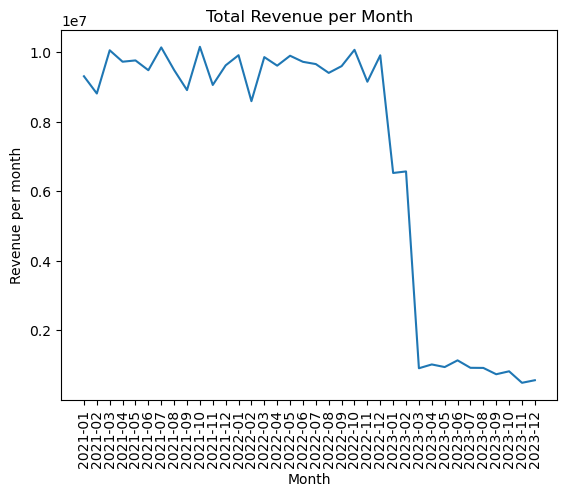

In [20]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df["total_rev"] = df["quantity"] * df["price"]

graph = df.groupby(df['invoice_date'].dt.to_period('M'))['total_rev'].sum()

graph.index = graph.index.astype(str)
plot.plot(graph.index, graph.values)
plot.xlabel('Month')
plot.ylabel('Revenue per month')
plot.title('Total Revenue per Month')
plot.xticks(rotation=90)
plot.show()

Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [24]:
age_bins = range(0, 101, 10)
age_labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
merge['Age Group'] = pd.cut(merge['age'], bins = age_bins, labels=age_labels)

merge

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,total_rev,Age Group
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson,7502.00,NaN
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson,162.64,NaN
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson,5401.53,NaN
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson,2700.72,NaN
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson,15004.25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell,600.17,NaN
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75,30-39
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00,NaN
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32,40-49


In [29]:
pivot_table=pd.pivot_table(merge, values="total_rev",index="category", columns="Age Group",aggfunc="sum")
pivot_table

Age Group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,19891.95,80128.35,84446.10,82946.25,79537.50,76234.80,56251.95,21103.95,0.0
Clothing,0.0,3029007.52,10079987.28,11516170.16,10933114.72,10819684.48,10004067.04,7871098.40,3739897.04,0.0
Cosmetics,0.0,178009.48,594733.82,722406.22,656740.32,621366.12,599735.00,427824.52,214684.80,0.0
Food & Beverage,0.0,20433.61,74271.23,89187.19,85034.57,77686.42,76127.88,55584.44,25334.12,0.0
Shoes,0.0,1367187.26,6152942.84,7178633.37,6775319.13,6268175.48,5499357.71,4718536.54,2125201.97,0.0
Souvenir,0.0,20128.68,53570.91,63705.63,65007.66,57594.30,51482.97,38439.21,20234.25,0.0
Technology,0.0,1772400.00,5049450.00,6231750.00,5840100.00,4662000.00,5218500.00,3773700.00,1449000.00,0.0
Toys,0.0,98273.28,380011.52,426460.16,378864.64,357002.24,340659.20,285608.96,126336.00,0.0
